In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
# Mnist = 60k+10k 28,28 bw imgs ; 0 digit label = 0; 10 classes
# Svhn = 73k+26k 3,32,32 imgs ; 0 digit label = 0; 10 classes

### Data Visualization - PCA, tSNE on MNIST and SVHN 

In [5]:
mnist_x=np.load('./MNIST/train_x.npy').reshape((60000,-1))
mnist_y=np.load('./MNIST/train_y.npy')
svhn_x=np.load('./SVHN/train_x.npy').reshape((73257,-1))/255.
svhn_y=np.load('./SVHN/train_y.npy')
mean = svhn_x.mean(axis=0,keepdims=True)
std = svhn_x.std(axis=0,keepdims=True)
svhn_x -= mean
svhn_x /= std

pca_mnist=decomposition.PCA(n_components=20)
pca_mnist.fit(mnist_x)
variances_mnist=pca_mnist.explained_variance_ratio_
pca_svhn=decomposition.PCA(n_components=20)
pca_svhn.fit(svhn_x)
variances_svhn=pca_svhn.explained_variance_ratio_

variances=np.round(100*np.array([variances_mnist,variances_svhn]),2)
df = pd.DataFrame(data=variances)
df.to_csv('pca_variances.csv')

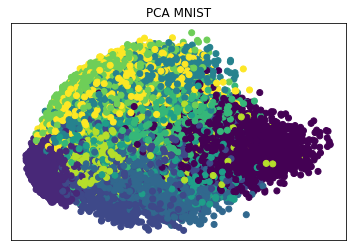

In [6]:
pca=decomposition.PCA(n_components=2)
pca.fit(mnist_x)
transformed_X_train = pca.transform(mnist_x)

plt.title('PCA MNIST')
plt.scatter(transformed_X_train[:,0], transformed_X_train[:,1], c=mnist_y)
plt.xticks(())
plt.yticks(())
plt.savefig('PCA_Mnist.png')
plt.show()

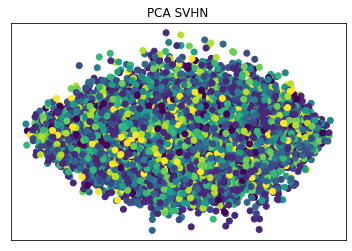

In [7]:
pca=decomposition.PCA(n_components=2)
pca.fit(svhn_x)
transformed_X_train = pca.transform(svhn_x)

plt.title('PCA SVHN')
plt.scatter(transformed_X_train[:,0], transformed_X_train[:,1], c=svhn_y)
plt.xticks(())
plt.yticks(())
plt.savefig('PCA_Svhn.png')
plt.show()

In [ ]:
#https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import time
import numpy as np

X_train = np.load('./MNIST/train_x.npy').reshape((60000,-1))
y_train = np.load('./MNIST/train_y.npy')

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_train)
# print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

np.save('tsne_mnist.npy',tsne_results)

X_train = (np.load('./SVHN/train_x.npy').reshape((73257,-1))/255.)[:20000]
y_train = np.load('./SVHN/train_y.npy')[:20000]
mean = X_train.mean(axis=0,keepdims=True)
std = X_train.std(axis=0,keepdims=True)
X_train -= mean
X_train /= std

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_train)
# print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

np.save('tsne_svhn.npy',tsne_results)

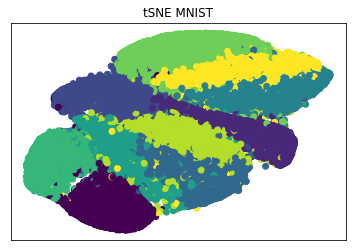

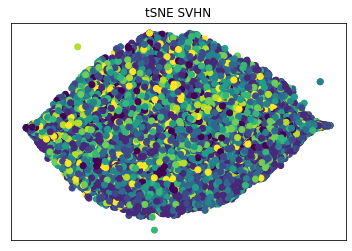

In [8]:
tsne_results=np.load('tsne_mnist.npy')
plt.title('tSNE MNIST')
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=mnist_y)
plt.xticks(())
plt.yticks(())
plt.savefig('tSNE_Mnist.png')
plt.show()
tsne_results=np.load('tsne_svhn.npy')
plt.title('tSNE SVHN')
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=svhn_y[:20000])
plt.xticks(())
plt.yticks(())
plt.savefig('tSNE_SVHN.png')
plt.show()

## Q3(1): Skewed Dataset Classification Problem

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import torch.optim as optim
import torch.backends.cudnn as cudnn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
x=np.load('./MNIST/train_x.npy')
y=np.load('./MNIST/train_y.npy')
print(.70*5000, .25*5000, .05*5000)
print(np.bincount(y))
zeros_x=x[y==0][:3500,:]
zeros_y=y[y==0][:3500]
print(zeros_x.shape, zeros_y.shape)
ones_x=x[y==1][:1250,:]
ones_y=y[y==1][:1250]
print(ones_x.shape, ones_y.shape)
two_x=x[y==2][:250,:]
two_y=y[y==2][:250]
print(two_x.shape, two_x.shape)
data_x=np.concatenate((zeros_x,ones_x,two_x))
data_y=np.concatenate((zeros_y,ones_y,two_y))
print(data_x.shape, data_y.shape)
indices=np.arange(0,5000,1)
np.random.shuffle(indices)
x_train=data_x[indices[:4000]]
y_train=data_y[indices[:4000]]
x_test=data_x[indices[4000:]]
y_test=data_y[indices[4000:]]
np.save('q3_part1_x_train.npy',x_train)
np.save('q3_part1_y_train.npy',y_train)
np.save('q3_part1_x_test.npy',x_test)
np.save('q3_part1_y_test.npy',y_test)

3500.0 1250.0 250.0
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
(3500, 28, 28) (3500,)
(1250, 28, 28) (1250,)
(250, 28, 28) (250, 28, 28)
(5000, 28, 28) (5000,)


In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, padding=1)
        self.conv2 = nn.Conv2d(6, 16, 3, padding=1)
        self.fc1   = nn.Linear(16*7*7, 120)
        self.fc2   = nn.Linear(120, 3)
    def forward(self, x):
        out = F.relu(self.conv1(x)) #6,28,28
        out = F.max_pool2d(out, 2) #6,14,14
        out = F.relu(self.conv2(out)) #16,14,14
        out = F.max_pool2d(out, 2) #16,7,7
        out = out.view(out.size(0), -1) 
        out = F.relu(self.fc1(out))
        out = self.fc2(out)
        return out

class SkewedMnist(Dataset):
    def __init__(self,train=True):
        self.train = train
        type_ = 'train' if train else 'test'
        Images_path='drive/My Drive/q3/q3_part1_x_'+type_+'.npy'
        Labels_path='drive/My Drive/q3/q3_part1_y_'+type_+'.npy'
        self.imgs=np.load(Images_path)
        self.lbls=np.load(Labels_path)
        print("Data Successfully Loaded into CPU")
    def __getitem__(self, index):
        img, target = self.imgs[index], self.lbls[index]
        img = Image.fromarray(img.astype(np.uint8))
        if self.train == True: # Apply train transform
            t1 = transforms.Compose(
                    [transforms.RandomCrop(28, padding=4), 
                    transforms.RandomHorizontalFlip()]) #can do since dataset has 0,1,2 digits only!
            img = t1(img)
        t2 = transforms.Compose(
            [transforms.ToTensor()])
        img = t2(img)        
        return img, target
    def __len__(self):
        return self.imgs.shape[0]

In [ ]:
net=LeNet()
net=net.to(torch.device('cuda'))
summary(net, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]              60
            Conv2d-2           [-1, 16, 14, 14]             880
            Linear-3                  [-1, 120]          94,200
            Linear-4                    [-1, 3]             363
Total params: 95,503
Trainable params: 95,503
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.36
Estimated Total Size (MB): 0.43
----------------------------------------------------------------


In [7]:
def classification_performance_metrics(y_pred, y_true, exp_name):
    y_pred = y_pred.astype('uint8')
    y_true = y_true.astype('uint8')
    confusion_matrix = np.zeros((3,3)) #left side - actual, top side - predicted
    for true_label in range(3):
        true_indices = y_true==true_label
        for pred_label in range(3):
            check_pred_labels = y_pred[true_indices]
            confusion_matrix[true_label][pred_label]= (check_pred_labels == pred_label).sum()
    confusion_matrix/=(confusion_matrix.sum(axis=1,keepdims=True))    #normalise it - dividing by column sum
    n=y_true.shape
    tp_indices = y_pred==y_true
    tp = y_true[tp_indices]
    true_y_per_class = np.bincount(y_true)
    labels = true_y_per_class.shape[0]
    tp_per_class = np.zeros((labels,))
    tp_per_class[:np.bincount(tp).shape[0]] = np.bincount(tp)
    predicted_y_per_class = np.zeros((labels,))
    predicted_y_per_class[:np.bincount(y_pred).shape[0]] = np.bincount(y_pred)
    precisions, recalls, F1s = [], [], []
    #precision, recall, F1 for each class
    for i in range(tp_per_class.shape[0]):
        TP = tp_per_class[i]
        TN = tp_per_class.sum() - TP
        FP = predicted_y_per_class[i] - TP
        FN = true_y_per_class[i] - TP
        precision = 100*TP/(TP+FP) if TP+FP!=0 else 0
        recall = 100*TP/(TP+FN) if TP+FN!=0 else 0
        F1 = 2*TP/(2*TP+FP+FN) if TP+FP+FN!=0 else 0
        FPR = FP/(FP+TN) if FP+TN!=0 else 0
        precisions.append(precision)
        recalls.append(recall)
        F1s.append(F1)
    if exp_name!=None:
        #save csv files
        categories=["0","1","2"]
        dikt = {}
        dikt['Precision']=np.round(precisions,2)
        dikt['Recall']=np.round(recalls,2)
        dikt['F1']=np.round(F1s,2)
        df = pd.DataFrame(data=dikt,index=categories)
        df.to_csv('%s_perClass.csv'%exp_name)
        df = pd.DataFrame(data=np.round(confusion_matrix,3),index=categories,columns=categories)
        df.to_csv('%s_ConfMat.csv'%exp_name)
    precisions=np.array(precisions)
    recalls=np.array(recalls)
    F1s=np.array(F1s)
    macro_F1=F1s.mean()
    return precisions, recalls, F1s, macro_F1, confusion_matrix
def accuracy(y_pred, y_true):
    return (y_pred==y_true).sum()/y_true.shape[0]
def Save_Stats(trainloss, trainacc, testloss, testacc, exp_name):
    data=[]
    data.append(trainloss)
    data.append(testloss)
    data.append(trainacc)
    data.append(testacc)
    data=np.array(data)
    data.reshape((4,-1))
    np.save('drive/My Drive/q3/%s_plts.npy'%exp_name,data)
    return np.max(data[3,:])

In [8]:
def main():
    exp_name='q3_part1_crossentropy'
    torch.manual_seed(1)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(torch.cuda.get_device_properties(0))
    # Data
    print('==> Preparing data..')
    trainset = SkewedMnist(train=True)
    trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
    testset = SkewedMnist(train=False)
    testloader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)
    print('==> Building model..')
    net = LeNet()
    net = net.to(device)
    if device == 'cuda':
        cudnn.benchmark = True
    start_epoch = 1
    best_acc=0
    lr=0.1
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr, weight_decay=5e-4)
    trainloss, testloss, trainacc, testacc = [], [], [], []
    for epoch in range(start_epoch, start_epoch+20):
        l,a=train(epoch, net, trainloader, device, optimizer, criterion)
        trainloss.append(l)
        trainacc.append(a)
        l,a,best_acc=test(epoch, best_acc, net, testloader, device, criterion, exp_name)
        testloss.append(l)
        testacc.append(a)
    Save_Stats(trainloss, trainacc, testloss, testacc, exp_name)
    with torch.no_grad():
        Images_path='drive/My Drive/q3/q3_part1_x_test.npy'
        Labels_path='drive/My Drive/q3/q3_part1_y_test.npy'
        imgs=np.load(Images_path)
        lbls=np.load(Labels_path)
        imgs=np.expand_dims(imgs,axis=1)
        imgs=torch.from_numpy(imgs)/255.
        lbls=torch.from_numpy(lbls)
        imgs=imgs.to(device)
        lbls=lbls.to(device)
        outputs = net(imgs)
        _, predicted = outputs.max(1)
        classification_performance_metrics(predicted.cpu().numpy(),lbls.cpu().numpy(),exp_name)
def train(epoch, net, trainloader, device, optimizer, criterion):
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
    return train_loss/(batch_idx+1), 100.*correct/total 
def test(epoch, best_acc, net, testloader, device, criterion,exp_name):
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    acc = 100.*correct/total
    if acc > best_acc:
        best_acc = acc
    return test_loss/(batch_idx+1), acc, best_acc

In [ ]:
main()

In [ ]:
def main():
    exp_name='q3_part1_mse'
    torch.manual_seed(1)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(torch.cuda.get_device_properties(0))
    # Data
    print('==> Preparing data..')
    trainset = SkewedMnist(train=True)
    trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
    testset = SkewedMnist(train=False)
    testloader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)
    print('==> Building model..')
    net = LeNet()
    net = net.to(device)
    if device == 'cuda':
        cudnn.benchmark = True
    start_epoch = 1
    best_acc=0
    lr=0.1
    criterion = nn.MSELoss()
    optimizer = optim.SGD(net.parameters(), lr=lr, weight_decay=5e-4)
    trainloss, testloss, trainacc, testacc = [], [], [], []
    for epoch in range(start_epoch, start_epoch+20):
        l,a=train(epoch, net, trainloader, device, optimizer, criterion)
        trainloss.append(l)
        trainacc.append(a)
        l,a,best_acc=test(epoch, best_acc, net, testloader, device, criterion, exp_name)
        testloss.append(l)
        testacc.append(a)
    Save_Stats(trainloss, trainacc, testloss, testacc, exp_name)
    with torch.no_grad():
        Images_path='drive/My Drive/q3/q3_part1_x_test.npy'
        Labels_path='drive/My Drive/q3/q3_part1_y_test.npy'
        imgs=np.load(Images_path)
        lbls=np.load(Labels_path)
        imgs=np.expand_dims(imgs,axis=1)
        imgs=torch.from_numpy(imgs)/255.
        lbls=torch.from_numpy(lbls)
        imgs=imgs.to(device)
        lbls=lbls.to(device)
        outputs = net(imgs)
        _, predicted = outputs.max(1)
        classification_performance_metrics(predicted.cpu().numpy(),lbls.cpu().numpy(),exp_name)
def train(epoch, net, trainloader, device, optimizer, criterion):
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        targets_1hot = torch.zeros((targets.shape[0],3),device=device,dtype=torch.float)
        for j in range(targets.shape[0]):
            targets_1hot[j,targets[j]]=1
        loss = criterion(outputs, targets_1hot)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
    return train_loss/(batch_idx+1), 100.*correct/total 
def test(epoch, best_acc, net, testloader, device, criterion,exp_name):
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            targets_1hot = torch.zeros((targets.shape[0],3),device=device,dtype=torch.float)
            for j in range(targets.shape[0]):
                targets_1hot[j,targets[j]]=1
            loss = criterion(outputs, targets_1hot)
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    acc = 100.*correct/total
    if acc > best_acc:
        best_acc = acc
    return test_loss/(batch_idx+1), acc, best_acc

In [ ]:
main()

In [1]:
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

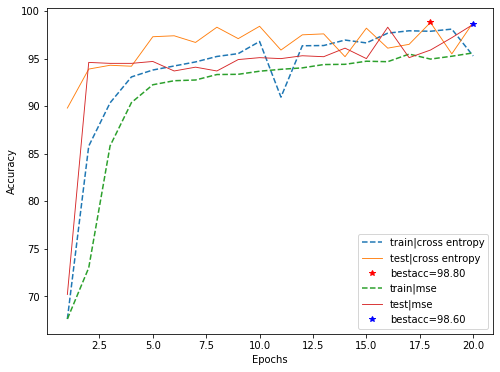

In [2]:
q3_part1_crossentropy_plts=np.load('q3_part1_crossentropy_plts.npy')
q3_part1_mse_plts=np.load('q3_part1_mse_plts.npy')
epochs=np.arange(1,q3_part1_crossentropy_plts.shape[1]+1,1)
plt.figure(figsize=(8.,6.))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs,q3_part1_crossentropy_plts[2],label='train|cross entropy',linestyle='--')
plt.plot(epochs,q3_part1_crossentropy_plts[3],label='test|cross entropy',linewidth=0.9)
ep=np.argmax(q3_part1_crossentropy_plts[3,:])
plt.plot(ep+1,q3_part1_crossentropy_plts[3,ep],'r*',label='bestacc=%.2f'%q3_part1_crossentropy_plts[3,ep])
plt.plot(epochs,q3_part1_mse_plts[2],label='train|mse',linestyle='--')
plt.plot(epochs,q3_part1_mse_plts[3],label='test|mse',linewidth=0.9)
ep=np.argmax(q3_part1_mse_plts[3,:])
plt.plot(ep+1,q3_part1_mse_plts[3,ep],'b*',label='bestacc=%.2f'%q3_part1_mse_plts[3,ep])
plt.legend()
plt.savefig('q3_part1.png')
plt.show()

1. mse requires the one hot representation of targets (not done implicitly like in cross entropy)
2. using onehot function of pytorch is not appt since the mini batches need not contain samples for each class (0,1,2) -> we might not always get 3dim representation

## Q3(2): Supervised Learning on dataset with labels from K-Means

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x_tsne=np.load('tsne_svhn.npy')
y=np.load('./SVHN/train_y.npy')[:20000]
print(x_tsne.shape, y.shape)
print(np.bincount(y))

(20000, 2) (20000,)
[1367 3784 2890 2326 2077 1889 1501 1520 1314 1332]


#### K-Means implementation from scratch

In [8]:
def initialise(X,K):
    np.random.shuffle(X)
    U = X[:K,:]
    return U
def createClusters(K,U):
    color = ["green","red","blue","yellow","orange","pink","brown","purple"]
    Clusters = {}
    for i in range(K):
        mean = U[i]
        points = []
        cluster = {
            'mean':mean,
            'points':points,
            'color': color[i]
        }
        Clusters[i] = cluster
    return Clusters

def assignPoints(X,U,Clusters):
    K = U.shape[0]
    Mat = np.ones((X.shape[0],K))
    for i in range(K):
        X_ = X
        Ui = U[i]
        Ui.reshape((1,-1))
        X_ = X_ - Ui
        X_ = X_**2
        X_ = np.sum(X_,axis=1)
        X_ = np.sqrt(X_)
        X_.reshape((-1,))
        Mat[:,i] = X_
    indices = np.argmin(Mat,axis=1)
    for i in range(K):
        X_in_Cluster_i = X[indices == i]
        Clusters[i]['points'] = X_in_Cluster_i # (no.of points in cluster i,m)
    return indices,Clusters

def KMeans(X,maxitr,U,K=5):
    clusters = createClusters(K,U)
    for i in range(maxitr):
        c,clusters = assignPoints(X,U,clusters)
        for j in range(K):
            den = np.sum(c == j)
            num = np.sum(X[c==j],axis=0)
            num.reshape((1,-1))
            if den!=0:
                clusters[j]['mean'] = num/den
                U[j,:] = num/den
#         PlotClusteredPoints(clusters)
    return clusters,c

def PlotClusteredPoints(clusters): # for two dimensional X
    for i in range(len(clusters)):
        pts = clusters[i]['points']
        clr = clusters[i]['color']
        mean = clusters[i]['mean']
        plt.scatter(pts[:,0],pts[:,1],color=clr)
        plt.scatter(mean[0],mean[1],color="black",marker="*")
        plt.xticks(())
        plt.yticks(())
    plt.show()
    return

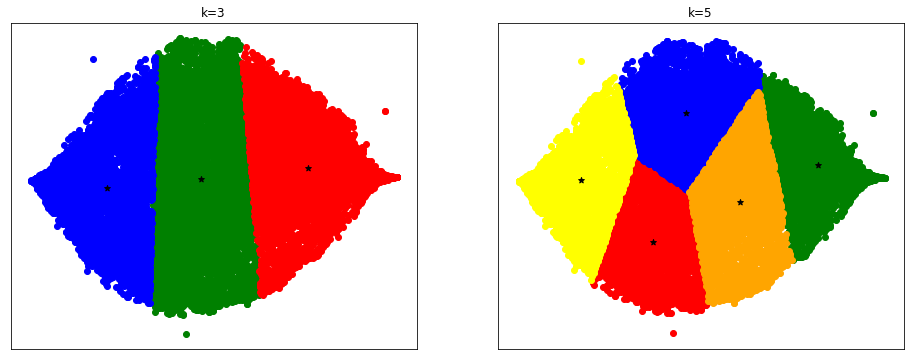

In [ ]:
plt.figure(figsize=(16.,6.))
for j,k in enumerate([3,5]):
    Uinit = initialise(x_tsne,K=k)
    clusters,c = KMeans(x_tsne,maxitr=8,U=Uinit,K=k)
    plt.subplot(1,2,j+1)
    for i in range(len(clusters)):
        pts = clusters[i]['points']
        clr = clusters[i]['color']
        mean = clusters[i]['mean']
        plt.title('k=%u'%k)
        plt.scatter(pts[:,0],pts[:,1],color=clr)
        plt.scatter(mean[0],mean[1],color="black",marker="*")
        plt.xticks(())
        plt.yticks(())
plt.savefig('svhn_kmeans_own.png')
plt.show()

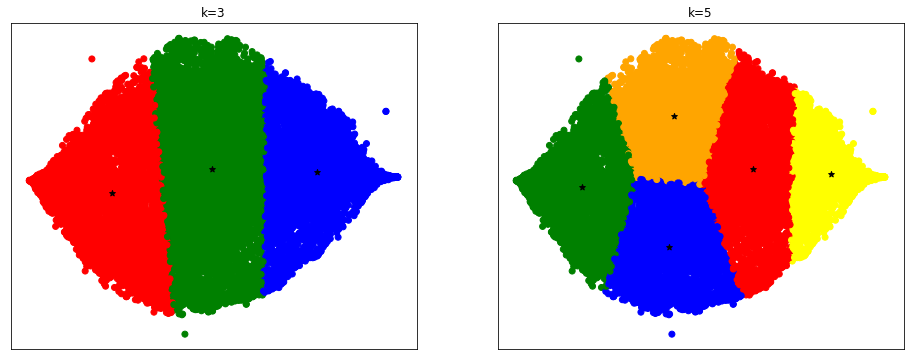

In [9]:
from sklearn.cluster import KMeans
color = ["green","red","blue","yellow","orange","pink","brown","purple"]
plt.figure(figsize=(16.,6.))
for j,k in enumerate([3,5]):
    km = KMeans(n_clusters = k)
    km.fit(x_tsne)
    means = km.cluster_centers_
    labels = km.labels_
    plt.subplot(1,2,j+1)
    plt.title('k=%u'%k)
    plt.scatter(x_tsne[:,0],x_tsne[:,1],color=np.array(color)[labels])
    for i in range(means.shape[0]):
        clr = color[i]
        mean = means[i]
        plt.scatter(mean[0],mean[1],color="black",marker="*")
    plt.xticks(())
    plt.yticks(())
plt.savefig('svhn_kmeans_sklearn.png')
plt.show()

#### Supervised learning on SVHN with labels obtained using K-Means

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
import torch.backends.cudnn as cudnn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import PIL.Image as Image
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import PIL.Image as Image
from sklearn.cluster import KMeans
class Smaller_LeNet(nn.Module):
    def __init__(self,k):
        super(Smaller_LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, padding=1)
        self.conv2 = nn.Conv2d(6, 16, 3, padding=1)
        self.fc1   = nn.Linear(16*8*8, k)
    def forward(self, x):
        out = F.relu(self.conv1(x)) #6,32,32
        out = F.max_pool2d(out, 2) #6,16,16
        out = F.relu(self.conv2(out)) #16,16,16
        out = F.max_pool2d(out, 2) #16,8,8
        out = out.view(out.size(0), -1) 
        out = self.fc1(out)
        return out
class SVHN_tSNE(Dataset):
    def __init__(self,train,x,y):
        self.train = train
        self.imgs=x
        self.lbls=y
        print("Data Successfully Loaded into CPU")
    def __getitem__(self, index):
        img, target = self.imgs[index], self.lbls[index]
        img = Image.fromarray(img.astype(np.uint8))
        if self.train == True: # Apply train transform
            t1 = transforms.Compose(
                    [transforms.RandomCrop(32, padding=4)])
            img = t1(img)
        t2 = transforms.Compose(
            [transforms.ToTensor()])
        img = t2(img)
        return img, target
    def __len__(self):
        return self.imgs.shape[0]

In [6]:
net=Smaller_LeNet(k=10)
net=net.to(torch.device('cuda'))
summary(net, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 32, 32]             168
            Conv2d-2           [-1, 16, 16, 16]             880
            Linear-3                   [-1, 10]          10,250
Total params: 11,298
Trainable params: 11,298
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.08
Params size (MB): 0.04
Estimated Total Size (MB): 0.13
----------------------------------------------------------------


In [13]:
def main(k):
    exp_name='q3_part2_svhn_%u'%k
    print(exp_name)
    torch.manual_seed(1)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    # Data
    print('==> Preparing data..')
    x_tsne=np.load('drive/My Drive/q3/tsne_svhn.npy')
    km = KMeans(n_clusters = k)
    km.fit(x_tsne)
    labels = km.labels_
    data=np.load('drive/My Drive/q3/svhn_train_x.npy')[:20000].transpose((0,2,3,1))
    x_train,y_train=data[:16000],labels[:16000]
    x_test,y_test=data[16000:],labels[16000:]
    trainset = SVHN_tSNE(True,x_train,y_train)
    trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
    testset = SVHN_tSNE(False,x_test,y_test)
    testloader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)
    print('==> Building model..')
    net = Smaller_LeNet(k)
    net = net.to(device)
    if device == 'cuda':
        cudnn.benchmark = True
    start_epoch = 1
    best_acc=0
    lr=0.1
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr, weight_decay=5e-4)
    trainloss, testloss, trainacc, testacc = [], [], [], []
    for epoch in range(start_epoch, start_epoch+20):
        l,a=train(epoch, net, trainloader, device, optimizer, criterion)
        trainloss.append(l)
        trainacc.append(a)
        l,a,best_acc=test(epoch, best_acc, net, testloader, device, criterion, exp_name)
        testloss.append(l)
        testacc.append(a)    
    test_acc=Save_Stats(trainloss, trainacc, testloss, testacc, exp_name)
    return test_acc
def train(epoch, net, trainloader, device, optimizer, criterion):
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets.long())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
    return train_loss/(batch_idx+1), 100.*correct/total 

def test(epoch, best_acc, net, testloader, device, criterion,exp_name):
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets.long())
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    acc = 100.*correct/total
    if acc > best_acc:
        best_acc = acc
    return test_loss/(batch_idx+1), acc, best_acc

In [14]:
Ks=[3,5,10,15,20]
test_accs=[]
for k in Ks:
    ta=main(k)
    test_accs.append(ta)
np.save('q3_part2_svhn_testaccs.npy',np.array(test_accs))

q3_part2_svhn_3
==> Preparing data..
Data Successfully Loaded into CPU
Data Successfully Loaded into CPU
==> Building model..
q3_part2_svhn_5
==> Preparing data..
Data Successfully Loaded into CPU
Data Successfully Loaded into CPU
==> Building model..
q3_part2_svhn_10
==> Preparing data..
Data Successfully Loaded into CPU
Data Successfully Loaded into CPU
==> Building model..
q3_part2_svhn_15
==> Preparing data..
Data Successfully Loaded into CPU
Data Successfully Loaded into CPU
==> Building model..
q3_part2_svhn_20
==> Preparing data..
Data Successfully Loaded into CPU
Data Successfully Loaded into CPU
==> Building model..


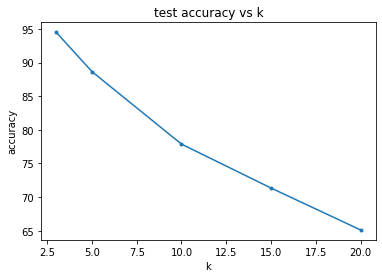

In [10]:
import numpy as np
import matplotlib.pyplot as plt
Ks=[3,5,10,15,20]
q3_part2_svhn_testaccs=np.load('q3_part2_svhn_testaccs.npy')
plt.title('test accuracy vs k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(Ks,q3_part2_svhn_testaccs,marker='.')
plt.savefig('q3_part2_svhn_testaccs.png')
plt.show()

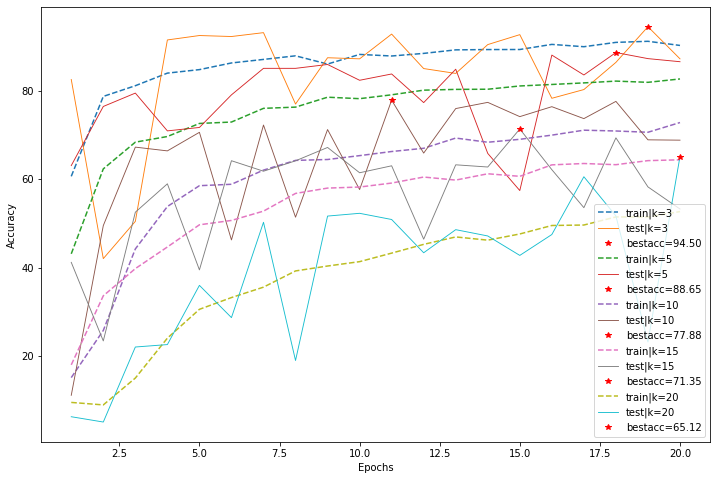

In [5]:
plt.figure(figsize=(12.,8.))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
for k in Ks:
    data=np.load('q3_part2_svhn_%u_plts.npy'%k)
    epochs=np.arange(1,data.shape[1]+1,1)
    plt.plot(epochs,data[2],label='train|k=%u'%k,linestyle='--')
    plt.plot(epochs,data[3],label='test|k=%u'%k,linewidth=0.9)
    ep=np.argmax(data[3,:])
    plt.plot(ep+1,data[3,ep],'r*',label='bestacc=%.2f'%data[3,ep])
plt.legend()
plt.savefig('q3_part2_plts.png')
plt.show()